<a href="https://colab.research.google.com/github/top430/temp_0623/blob/master/wholesalecumter_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!ls

sample_data  Wholesale_customers_data.csv  wholesale.xls


In [16]:
!ls -l


total 68
drwxr-xr-x 1 root root  4096 Jun 15 13:37 sample_data
-rw-r--r-- 1 root root 15021 Jul  2 04:45 Wholesale_customers_data.csv
-rw-r--r-- 1 root root 46592 Jul  2 06:23 wholesale.xls


In [17]:
!pwd

/content


In [18]:
!ls -l ./sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jun 15 13:37 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jun 15 13:37 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jun 15 13:37 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jun 15 13:37 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [19]:
!ls -l ./Wholesale_customers_data.csv

-rw-r--r-- 1 root root 15021 Jul  2 04:45 ./Wholesale_customers_data.csv


In [21]:
import pandas as pd
df = pd.read_csv('./Wholesale_customers_data.csv')
df.info()
X = df.iloc[:,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [22]:
X.shape


(440, 8)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [24]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)

In [25]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:

kmeans.labels_

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 3, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 2, 3,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2,
       2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1,

In [27]:

df['label'] = kmeans.labels_

In [28]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


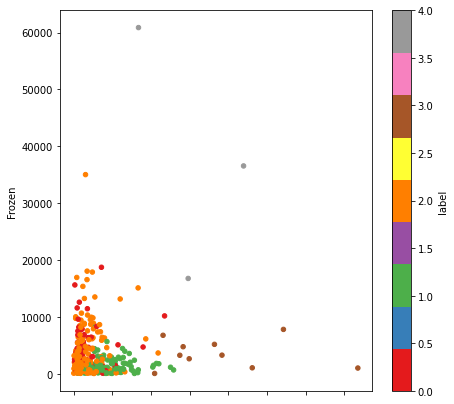

In [29]:
df.plot(kind='scatter', x='Milk', y='Frozen', c='label', cmap='Set1', figsize=(7,7))


In [30]:
dfx = df[~((df['label'] == 0) | (df['label'] == 4))]
df.shape, dfx.shape

((440, 9), (346, 9))

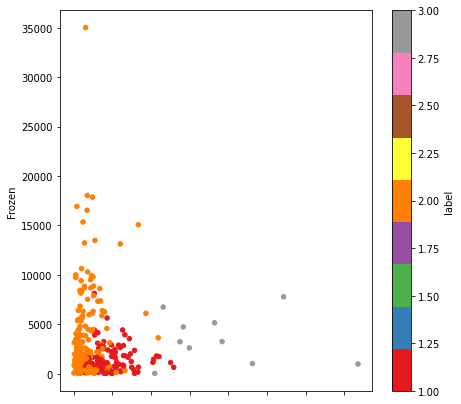

In [31]:
dfx.plot(kind='scatter', x='Milk', y='Frozen', c='label', cmap='Set1', figsize=(7,7))


In [33]:
df.to_excel('./wholesale.xls')